In [138]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
con = pd.read_excel('Concrete_Data.xls')

In [4]:
con.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [10]:
con.shape

(1030, 9)

In [90]:
con.columns = ['Cement', 'BlastFur','Flyash','Water', 'Superplastic','CoarsAgg', 'FinAgg', 'Age','ConStr']

In [91]:
con.head()

,Cement,BlastFur,Flyash,Water,Superplastic,CoarsAgg,FinAgg,Age,ConStr
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
con.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [97]:
x= con.iloc[:,:-1]
y= con.iloc[:,-1]

In [98]:
x_temp, x_test, y_temp, y_test = train_test_split(x,y, test_size=0.3, random_state=5)
x_train, x_val, y_train, y_val = train_test_split(x_temp,y_temp, test_size=0.3, random_state=5)

In [81]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

print('Training:\t',linreg.score(x_train,y_train))
print('Validation :\t',linreg.score(x_val,y_val))
print('Testing : \t', linreg.score(x_test,y_test))

Training:	 0.6375829189070663
Validation :	 0.6209141470616166
Testing : 	 0.5650153213702251


In [82]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is\t\t {}".format(col_name, linreg.coef_[idx]))

The coefficient for Cement (component 1)(kg in a m^3 mixture) is		 0.1293174271883698
The coefficient for Blast Furnace Slag (component 2)(kg in a m^3 mixture) is		 0.11050143754524508
The coefficient for Fly Ash (component 3)(kg in a m^3 mixture) is		 0.09886701236446199
The coefficient for Water  (component 4)(kg in a m^3 mixture) is		 -0.1346248416578738
The coefficient for Superplasticizer (component 5)(kg in a m^3 mixture) is		 0.23938819535997474
The coefficient for Coarse Aggregate  (component 6)(kg in a m^3 mixture) is		 0.02244712630046495
The coefficient for Fine Aggregate (component 7)(kg in a m^3 mixture) is		 0.02578364163407729
The coefficient for Age (day) is		 0.11386024774165403


In [83]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [84]:
from sklearn import preprocessing

x_train_scal = preprocessing.scale(x_train)
x_val_scal = preprocessing.scale(x_val)
x_test_scal = preprocessing.scale(x_test)

ridge = Ridge(alpha=0.3)
ridge.fit(x_train_scal,y_train)

print('Training :\t',ridge.score(x_train_scal, y_train))
print('Validation :\t',ridge.score(x_val_scal,y_val))
print('Testing : \t', ridge.score(x_test_scal, y_test))

Training :	 0.6375752613980765
Validation :	 0.6176403450539234
Testing : 	 0.545952405776374


C:\Users\Gaurav\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gaurav\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\Gaurav\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


In [86]:
lasso = Lasso(alpha=0.3)

lasso.fit(x_train,y_train)
 
print('Training :\t',lasso.score(x_train, y_train))
print('Validation :\t',lasso.score(x_val,y_val))
print('Testing : \t', lasso.score(x_test, y_test))

Training :	 0.6375623163092996
Validation :	 0.6207958159650362
Testing : 	 0.5648240127786504


In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Gaurav\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


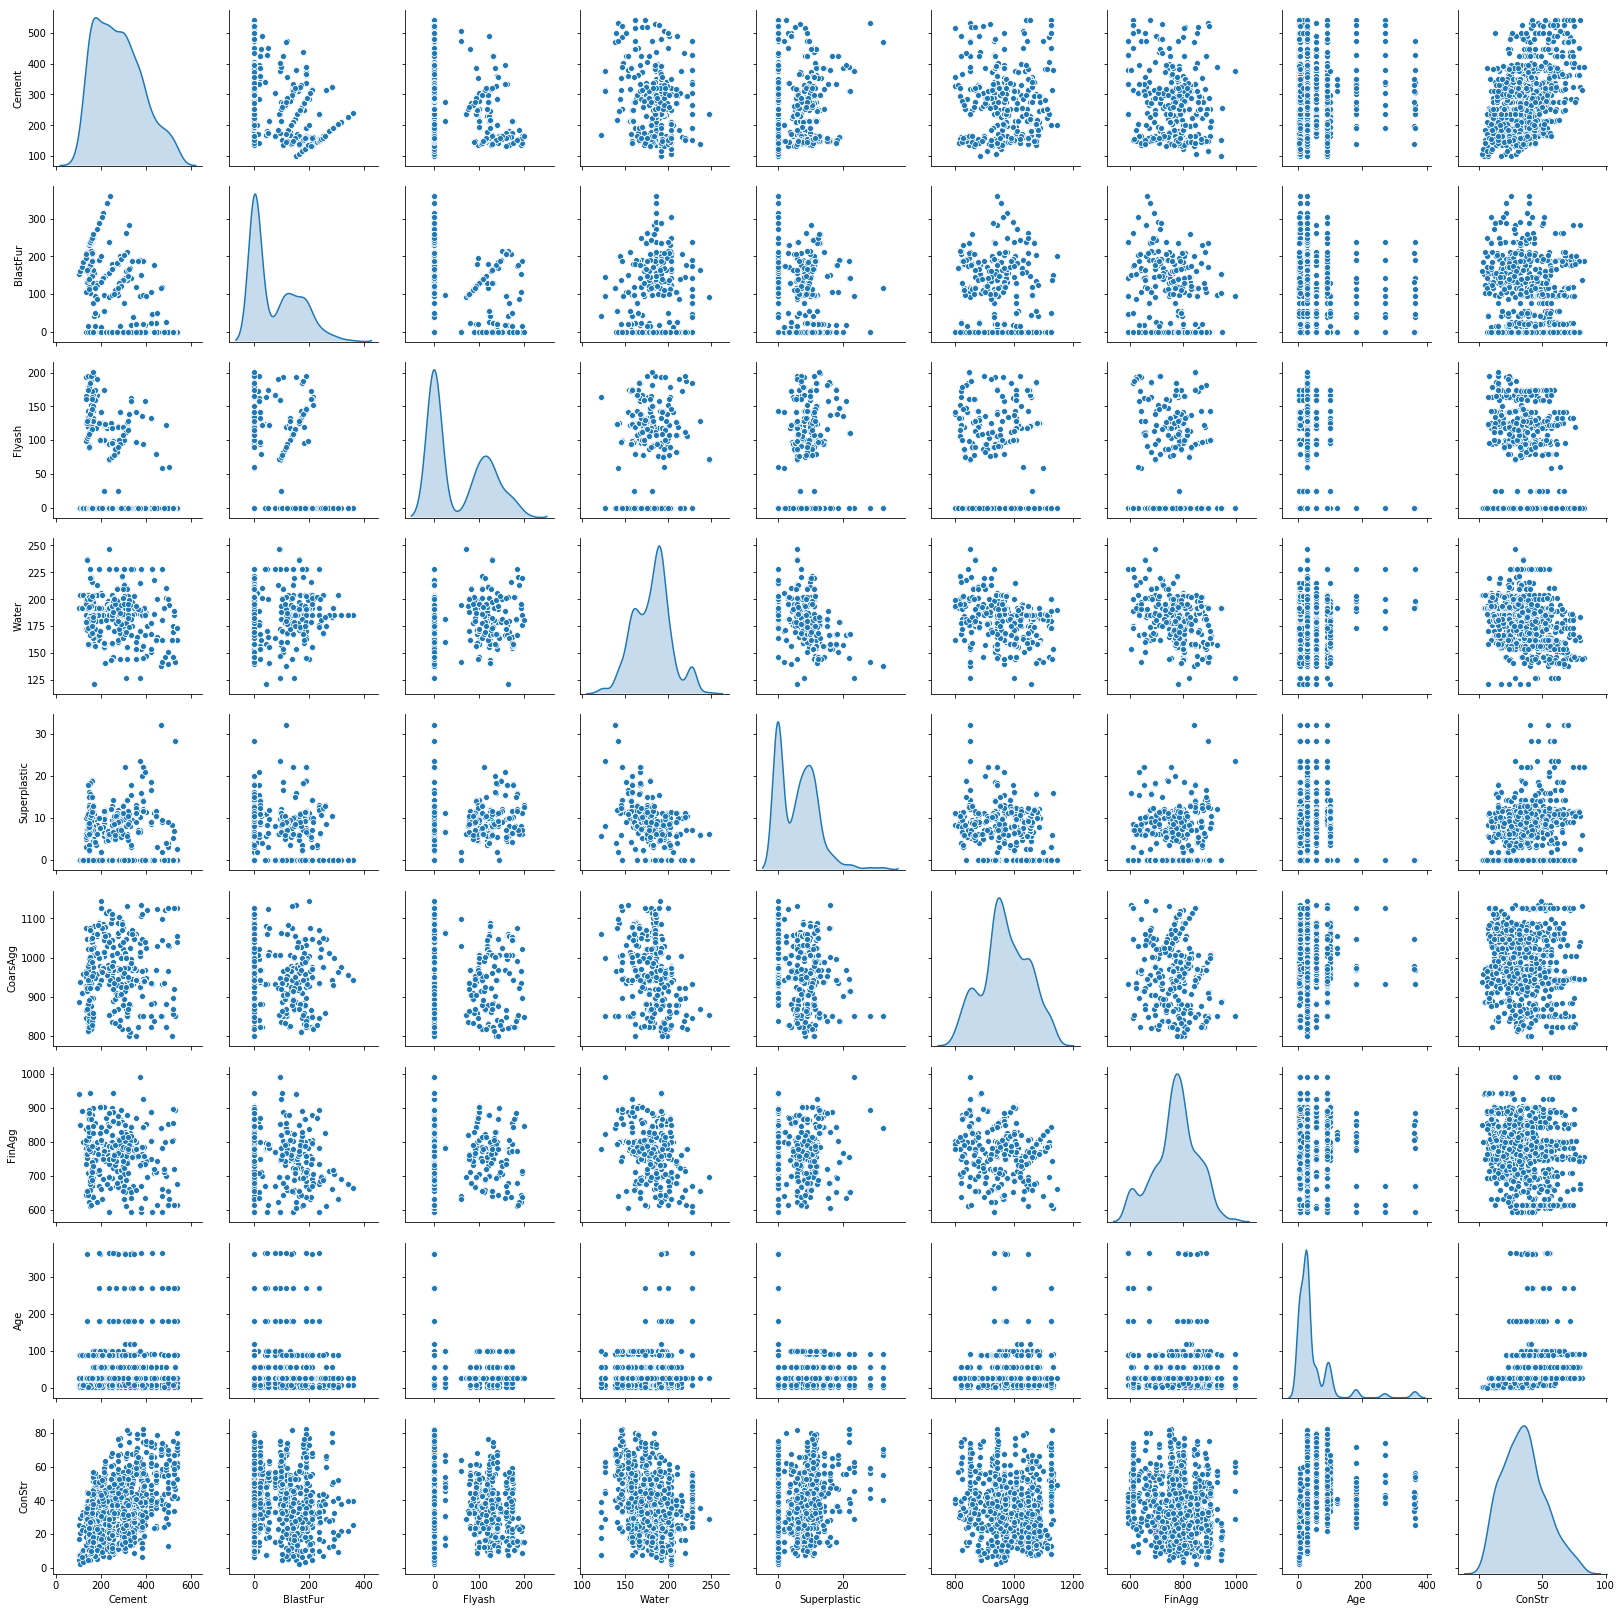

In [92]:
sns.pairplot(con,diag_kind='kde')
plt.show()

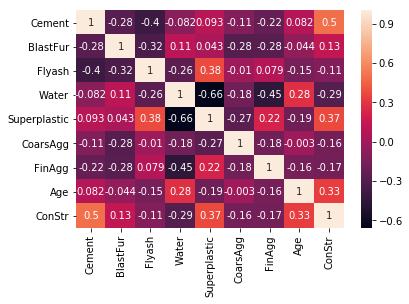

In [93]:
sns.heatmap(con.corr(),annot= True)
plt.show()

In [94]:
from sklearn.preprocessing import PolynomialFeatures

In [95]:
poly = PolynomialFeatures(degree= 2, interaction_only=True)

In [152]:
x_train_poly=poly.fit_transform(x_train)
x_val_poly = poly.transform(x_val)
x_test_poly = poly.transform(x_test)

In [153]:
linreg = LinearRegression()
linreg.fit(x_train_poly,y_train)

print('Training:\t',linreg.score(x_train_poly,y_train))
print('Validation :\t',linreg.score(x_val_poly,y_val))
print('Testing : \t', linreg.score(x_test_poly,y_test))

Training:	 0.7634370736841783
Validation :	 0.7604362257339325
Testing : 	 0.7369293401457297


In [154]:
x_train_scal = preprocessing.scale(x_train_poly)
x_val_scal = preprocessing.scale(x_val_poly)
x_test_scal = preprocessing.scale(x_test_poly)

ridge = Ridge(alpha=0.3)
ridge.fit(x_train_scal,y_train)

print('Training :\t',ridge.score(x_train_scal, y_train))
print('Validation :\t',ridge.score(x_val_scal,y_val))
print('Testing : \t', ridge.score(x_test_scal, y_test))

Training :	 0.7622334125908357
Validation :	 0.7427311990394385
Testing : 	 0.7283132744901688


In [155]:
lasso = Lasso(alpha=0.3)

lasso.fit(x_train_poly,y_train)

print('Training :\t',lasso.score(x_train_poly, y_train))
print('Validation :\t',lasso.score(x_val_poly,y_val))
print('Testing : \t', lasso.score(x_test_poly, y_test))

Training :	 0.7621744397182988
Validation :	 0.7596638179726923
Testing : 	 0.7364085367195177


In [156]:
x_test_poly

array([[1.00000000e+00, 2.29680000e+02, 0.00000000e+00, ...,
        7.78919403e+05, 3.08430000e+03, 2.27289000e+03],
       [1.00000000e+00, 3.59000000e+02, 1.90000000e+01, ...,
        7.54542000e+05, 6.59400000e+03, 5.60700000e+03],
       [1.00000000e+00, 5.25000000e+02, 0.00000000e+00, ...,
        6.89625000e+05, 7.87500000e+03, 4.29100000e+03],
       ...,
       [1.00000000e+00, 2.75000000e+02, 0.00000000e+00, ...,
        8.79104000e+05, 3.04640000e+04, 2.26240000e+04],
       [1.00000000e+00, 3.59000000e+02, 1.90000000e+01, ...,
        7.54542000e+05, 2.63760000e+04, 2.24280000e+04],
       [1.00000000e+00, 1.08300000e+02, 1.62400000e+02, ...,
        7.96531800e+05, 6.56740000e+03, 5.94300000e+03]])

In [157]:
from sklearn.model_selection import GridSearchCV

In [158]:
param = {'alpha': [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]}

In [159]:
griridge = GridSearchCV(ridge, param, cv=5)
griridge.fit(x_train_scal,y_train)
griridge.best_params_

{'alpha': 0.5}

In [160]:
grilasso = GridSearchCV(lasso, param, cv=5)
griridge.fit(x_train_poly,y_train)
griridge.best_params_

{'alpha': 10}

In [146]:
lasso_model= Lasso(alpha=0.3)
ridge_model= Ridge(alpha=7)
lin_model = LinearRegression()


from sklearn.utils import resample

# load dataset
values = con.values   # original data with 10 data points



# configure bootstrap
n_iterations = 100              # picking only 50 % of the given data in every bootstrap sample
n_size = int(len(values) * 1)    # Number of bootstrap samples to create = 10


# run bootstrap
linreg_stats = list()
ridge_stats = list()
lasso_stats = list()

for i in range(n_iterations):
	# prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    #getting test values
    trainset = set([tuple(x) for x in train])
    valueset = set([tuple(x) for x in values])
    test = np.array([x for x in valueset-trainset])
    
    x_train = train[:,:-1]
    y_train = train[:,-1]
    x_test = test[:,:-1]
    y_test = test[:,-1]
    
    x_train_poly= poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)
    x_train_poly_scal = preprocessing.scale(x_train_poly)
    x_test_poly_scal = preprocessing.scale(x_test_poly)

    lin_model.fit(x_train_poly,y_train)
    linregscore=lin_model.score(x_test_poly, y_test)
    linreg_stats.append(linregscore)
    
    
    ridge_model.fit(x_train_poly_scal, y_train)
    ridgescore = ridge_model.score(x_test_poly_scal,y_test)
    ridge_stats.append(ridgescore)
    
    lasso_model.fit(x_train_poly,y_train)
    lassoscore = lasso_model.score(x_test_poly,y_test)
    lasso_stats.append(lassoscore)

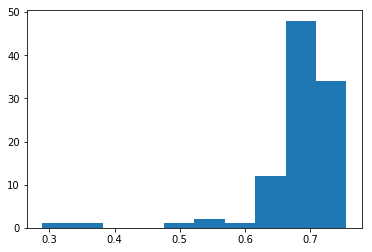

95.0 confidence interval 50.8% and 74.2%


In [147]:
from matplotlib import pyplot

# plot scores
pyplot.hist(linreg_stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(linreg_stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(linreg_stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

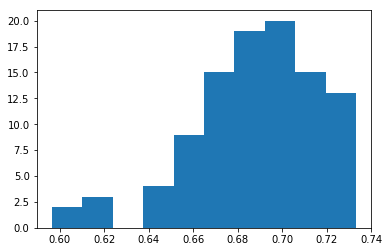

95.0 confidence interval 61.7% and 73.1%


In [148]:
from matplotlib import pyplot

# plot scores
pyplot.hist(ridge_stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(ridge_stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(ridge_stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

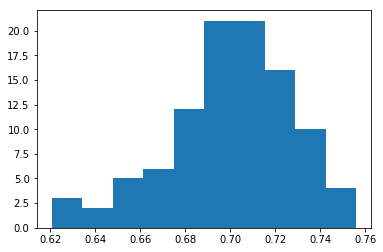

95.0 confidence interval 63.6% and 74.5%


In [149]:
from matplotlib import pyplot

# plot scores
pyplot.hist(lasso_stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(lasso_stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(lasso_stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [145]:
ridge_model.intercept_

34.225803993678454

In [164]:
from sklearn.tree import DecisionTreeRegressor

In [195]:
x= con.iloc[:,:-1]
y= con.iloc[:,-1]

x_temp, x_test, y_temp, y_test = train_test_split(x,y, test_size=0.3, random_state=5)
x_train, x_val, y_train, y_val = train_test_split(x_temp,y_temp, test_size=0.3, random_state=5)

In [185]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

print('Training :\t', dt_model.score(x_train,y_train))
print('Validation :\t',dt_model.score(x_val,y_val))
print('Testing :\t',dt_model.score(x_test,y_test))

Training :	 0.9947686340366001
Validation :	 0.8166019793261577
Testing :	 0.7301307702148403


In [173]:
dt_model.get_params

<bound method BaseEstimator.get_params of DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')>

In [178]:
pd.DataFrame({'Columns': x_train.columns, 'Importance':dt_model.feature_importances_})

,Columns,Importance
0,Cement,0.315160
1,BlastFur,0.047648
2,Flyash,0.025134
3,Water,0.106510
4,Superplastic,0.071736
5,CoarsAgg,0.033554
6,FinAgg,0.051031
7,Age,0.349226


In [196]:
x= x.drop(['Flyash','Superplastic','CoarsAgg','FinAgg'], axis=1)
y= y

x_temp, x_test, y_temp, y_test = train_test_split(x,y, test_size=0.3, random_state=5)
x_train, x_val, y_train, y_val = train_test_split(x_temp,y_temp, test_size=0.3, random_state=5)

In [197]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

print('Training :\t', dt_model.score(x_train,y_train))
print('Validation :\t',dt_model.score(x_val,y_val))
print('Testing :\t',dt_model.score(x_test,y_test))

Training :	 0.9924899731950343
Validation :	 0.8340789801571065
Testing :	 0.7968380661894916


In [198]:
from sklearn.ensemble import BaggingRegressor

In [199]:
bg_model = BaggingRegressor()
bg_model.fit(x_train,y_train)

print('Training :\t', bg_model.score(x_train,y_train))
print('Validation :\t',bg_model.score(x_val,y_val))
print('Testing :\t',bg_model.score(x_test,y_test))

Training :	 0.9686096901583908
Validation :	 0.8928622595941319
Testing :	 0.8636927619107804


In [200]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [201]:
gb_model = GradientBoostingRegressor(n_estimators=50)
ab_model = AdaBoostRegressor(n_estimators=50)
rf_model = RandomForestRegressor(n_estimators=50)

In [202]:
gb_model.fit(x_train,y_train)
ab_model.fit(x_train,y_train)
rf_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [203]:
print('Training :\t', gb_model.score(x_train,y_train))
print('Validation :\t',gb_model.score(x_val,y_val))
print('Testing :\t',gb_model.score(x_test,y_test))

Training :	 0.9101253071646412
Validation :	 0.8888726536776239
Testing :	 0.8259870011616284


In [204]:
print('Training :\t', ab_model.score(x_train,y_train))
print('Validation :\t',ab_model.score(x_val,y_val))
print('Testing :\t',ab_model.score(x_test,y_test))

Training :	 0.828218258620791
Validation :	 0.8260827157370857
Testing :	 0.7543124811832171


In [205]:
print('Training :\t', rf_model.score(x_train,y_train))
print('Validation :\t',rf_model.score(x_val,y_val))
print('Testing :\t',rf_model.score(x_test,y_test))

Training :	 0.9763690292401659
Validation :	 0.897466062456216
Testing :	 0.8585401464707765


In [208]:
param = {'max_depth': np.arange(1,30)}

In [209]:
gsrf = GridSearchCV(rf_model, param, cv=5)
gsrf.fit(x,y)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [210]:
gsrf.best_params_

{'max_depth': 19}

In [213]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [219]:
param_dist = {"max_depth": sp_randint(1, 50)}
randomCV = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=1000)

In [220]:
randomCV.fit(x,y)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=1000, n_jobs=None,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022FCD0015C0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [222]:
randomCV.best_params_

{'max_depth': 44}

In [223]:
rf_model = RandomForestRegressor(n_estimators=50, max_depth=44)
rf_model.fit(x_train,y_train)

print('Training :\t', rf_model.score(x_train,y_train))
print('Validation :\t',rf_model.score(x_val,y_val))
print('Testing :\t',rf_model.score(x_test,y_test))

Training :	 0.97495395046508
Validation :	 0.901430427125153
Testing :	 0.8685432984865149


In [224]:
pprint(rf_model.get_params())

Pretty printing has been turned OFF
